# Load / Display / Save Images 

In [1]:
import cv2
import matplotlib.pyplot as plt

width: 350 pixels
height: 228 pixels
channels: 3


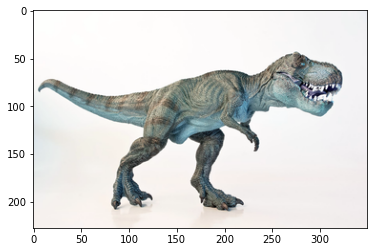

True

In [2]:
# Load the image and show some basic information on it
img_Nm = './images/trex.png'

image = cv2.imread(img_Nm)
print("width: {} pixels".format(image.shape[1]))
print("height: {} pixels".format(image.shape[0]))
print("channels: {}".format(image.shape[2]))

# Show the image and wait for a keypress
#cv2.imshow("Image", image)
#cv2.waitKey(0)
plt.imshow(image)
plt.show()

# Save the image -- OpenCV handles converting filetypes
# automatically
cv2.imwrite("newimage.jpg", image)

In [3]:
image.shape

(228, 350, 3)

# Image Basics

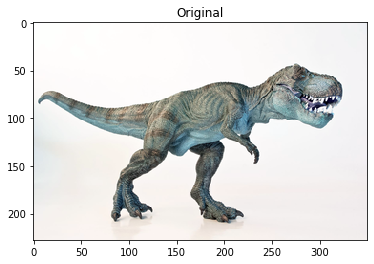

Pixel at (0, 0) - Red: 254, Green: 254, Blue: 254


In [9]:
# Load the image and show it
img_Nm = './images/trex.png'

image = cv2.imread(img_Nm)
#cv2.imshow("Original", image)
plt.imshow(image)
plt.title('Original')
plt.show()

# Images are just NumPy arrays. The top-left pixel can be
# found at (0, 0)
(b, g, r) = image[0, 0]
print("Pixel at (0, 0) - Red: {}, Green: {}, Blue: {}".format(r, g, b))



Pixel at (0, 0) - Red: 255, Green: 0, Blue: 0


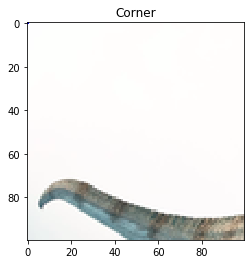

In [10]:
# Now, let's change the value of the pixel at (0, 0) and
# make it red
image[0, 0] = (0, 0, 255)
(b, g, r) = image[0, 0]
print("Pixel at (0, 0) - Red: {}, Green: {}, Blue: {}".format(r, g, b))

# Since we are using NumPy arrays, we can apply slicing and
# grab large chunks of the image. Let's grab the top-left
# corner
corner = image[0:100, 0:100]
#cv2.imshow("Corner", corner)
plt.imshow(corner)
plt.title('Corner')
plt.show()



In [12]:
image.shape

(228, 350, 3)

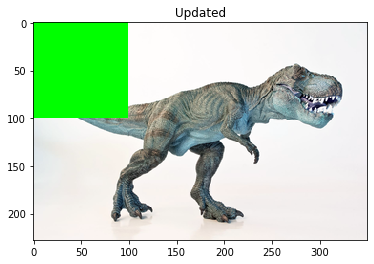

In [11]:
# Let's make the top-left corner of the image green
image[0:100, 0:100] = (0, 255, 0)

# Show our updated image
#cv2.imshow("Updated", image)
plt.imshow(image)
plt.title('Updated')
plt.show()

# Drawing 

In [1]:
# Import the necessary packages
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [32]:

# Initialize our canvas as a 300x300 with 3 channels,
# Red, Green, and Blue, with a black background
canvas = np.zeros((300, 300, 3), dtype = "uint8")




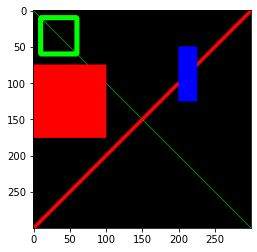

In [6]:
import numpy as np
# Initialize our canvas as a 300x300 with 3 channels,
# Red, Green, and Blue, with a black background
canvas = np.zeros((300, 300, 3), dtype = "uint8")

# Draw a green line from the top-left corner of our canvas
# to the bottom-right
red = (255, 0, 0)
green = (0, 255, 0)
blue = (0, 0, 255)

canvas = cv2.line(canvas, (0, 0), (300, 300), green)


canvas = cv2.line(canvas, (300, 0), (0, 300), red, 3)

# Draw a green 50x50 pixel square, starting at 10x10 and
# ending at 60x60
canvas = cv2.rectangle(canvas, (10, 10), (60, 60), green, 5)

# Let's draw one last rectangle: blue and filled in

canvas = cv2.rectangle(canvas, (200, 50), (225, 125), blue, -1)

canvas = cv2.rectangle(canvas, (0, 75), (100, 175), red, -1)

#cv2.imshow("Canvas", canvas)
#cv2.waitKey(0)

plt.imshow(canvas)
plt.show()

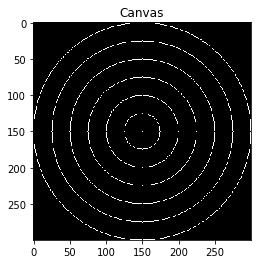

In [4]:
# Reset our canvas and draw a white circle at the center
# of the canvas with increasing radii - from 25 pixels to
# 150 pixels
canvas = np.zeros((300, 300, 3), dtype = "uint8")
(centerX, centerY) = (canvas.shape[1] // 2, canvas.shape[0] // 2)
white = (255, 255, 255)

for r in range(0, 175, 25):
    canvas = cv2.circle(canvas, (centerX, centerY), r, white)

plt.imshow(canvas)
plt.title('Canvas')
plt.show()





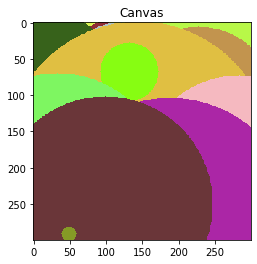

In [9]:
# Reset our canvas and draw a white circle at the center
# of the canvas with increasing radii - from 25 pixels to
# 150 pixels
canvas = np.zeros((300, 300, 3), dtype = "uint8")

# Let's go crazy and draw 25 random circles
for i in range(0, 25):
    # randomly generate a radius size between 5 and 200,
    # generate a random color, and then pick a random
    # point on our canvas where the circle will be drawn
    radius = np.random.randint(5, high = 200)
    color = np.random.randint(0, high = 256, size = (3,)).tolist()
    pt = np.random.randint(0, high = 300, size = (2,))

    # draw our random circle
    canvas = cv2.circle(canvas, tuple(pt), radius, color, -1)

# Show our masterpiece
plt.imshow(canvas)
plt.title('Canvas')
plt.show()


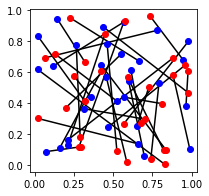

In [5]:
np.random.seed(0)
n = 32
a = np.random.uniform(0, 1, (n, 2))
b = np.random.uniform(0, 1, (n, 2))

fig, ax = plt.subplots(figsize=(3, 3))
ab_pairs = np.c_[a, b]
ab_args = ab_pairs.reshape(-1, 2, 2).swapaxes(1, 2).reshape(-1, 2)

# segments
ax.plot(*ab_args, c='k')

# identify points: a in blue, b in red
ax.plot(*a.T, 'bo')
ax.plot(*b.T, 'ro')
plt.show()

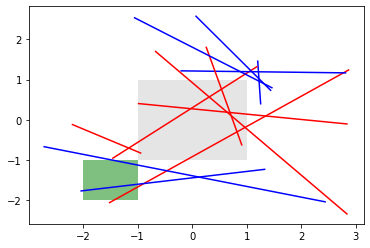

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.transforms import Bbox
from matplotlib.path import Path

# Fixing random state for reproducibility
np.random.seed(19680801)


left, bottom, width, height = (-1, -1, 2, 2)
rect = plt.Rectangle((left, bottom), width, height,
                     facecolor="black", alpha=0.1)

rect1 = plt.Rectangle((2*left, 2*bottom), width/2, height/2,
                     facecolor="green", alpha=0.5)

fig, ax = plt.subplots()
ax.add_patch(rect)
ax.add_patch(rect1)

bbox = Bbox.from_bounds(left, bottom, width, height)

for i in range(12):
    vertices = (np.random.random((2, 2)) - 0.5) * 6.0
    path = Path(vertices)
    #print(vertices, path)
    if path.intersects_bbox(bbox):
        color = 'r'
    else:
        color = 'b'
    ax.plot(vertices[:, 0], vertices[:, 1], color=color)

plt.show()

In [11]:
bbox

Bbox([[-1.0, -1.0], [1.0, 1.0]])

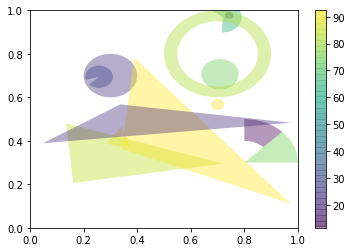

In [13]:
import numpy as np
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)


fig, ax = plt.subplots()

resolution = 50  # the number of vertices
N = 3
x = np.random.rand(N)
y = np.random.rand(N)
radii = 0.1*np.random.rand(N)
patches = []
for x1, y1, r in zip(x, y, radii):
    circle = Circle((x1, y1), r)
    patches.append(circle)

x = np.random.rand(N)
y = np.random.rand(N)
radii = 0.1*np.random.rand(N)
theta1 = 360.0*np.random.rand(N)
theta2 = 360.0*np.random.rand(N)
for x1, y1, r, t1, t2 in zip(x, y, radii, theta1, theta2):
    wedge = Wedge((x1, y1), r, t1, t2)
    patches.append(wedge)

# Some limiting conditions on Wedge
patches += [
    Wedge((.3, .7), .1, 0, 360),             # Full circle
    Wedge((.7, .8), .2, 0, 360, width=0.05),  # Full ring
    Wedge((.8, .3), .2, 0, 45),              # Full sector
    Wedge((.8, .3), .2, 45, 90, width=0.10),  # Ring sector
]

for i in range(N):
    polygon = Polygon(np.random.rand(N, 2), True)
    patches.append(polygon)

colors = 100 * np.random.rand(len(patches))
p = PatchCollection(patches, alpha=0.4)
p.set_array(colors)
ax.add_collection(p)
fig.colorbar(p, ax=ax)

plt.show()

# Image Processing: Transformations

## Translations

In [7]:
# Import the necessary packages
import numpy as np
import cv2
import matplotlib.pyplot as plt
img_Nm = './images/trex.png'

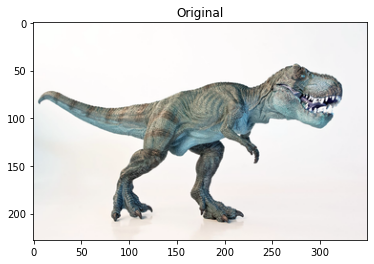

In [8]:
# Load the image and show it
image = cv2.imread(img_Nm)

plt.imshow(image)
plt.title('Original')
plt.show()

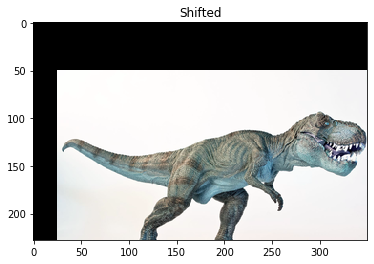

In [17]:
# NOTE: Translating (shifting) an image is given by a
# NumPy matrix in the form:
#	[[1, 0, shiftX], [0, 1, shiftY]]
# You simply need to specify how many pixels you want
# to shift the image in the X and Y direction.
# Let's translate the image 25 pixels to the right and
# 50 pixels down
M = np.float32([[1, 0, 25], [0, 1, 50]])
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

plt.imshow(shifted)
plt.title('Shifted')
plt.show()

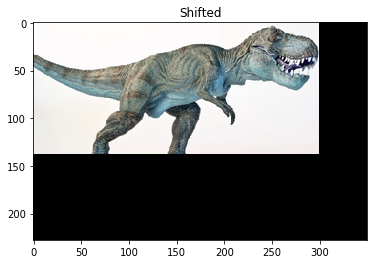

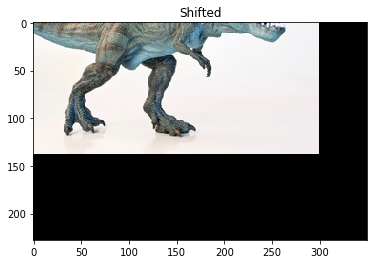

In [18]:
# Now, let's shift the image 50 pixels to the left and
# 90 pixels up. We accomplish this using negative values
M = np.float32([[1, 0, -50], [0, 1, -90]])
shifted = cv2.warpAffine(shifted, M, (image.shape[1], image.shape[0]))

plt.imshow(shifted)
plt.title('Shifted')
plt.show()

M = np.float32([[1, 0, -50], [0, 1, -90]])
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

plt.imshow(shifted)
plt.title('Shifted')
plt.show()

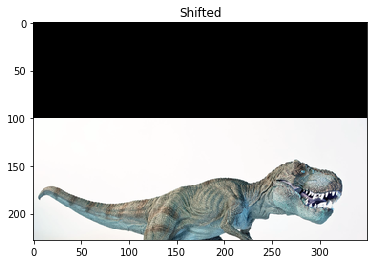

In [21]:
import imutils

# Finally, let's use our helper function in imutils.py to
# shift the image down 100 pixels
shifted = imutils.translate(image, 0, 100)

plt.imshow(shifted)
plt.title('Shifted')
plt.show()

## Rotation

In [9]:
# Import the necessary packages
import matplotlib.pyplot as plt
import numpy as np
import imutils
import cv2

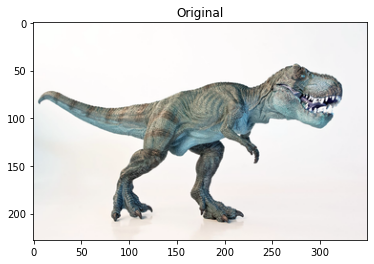

In [10]:
# Load the image and show it
img_Nm = './images/trex.png'

image = cv2.imread(img_Nm)

plt.imshow(image)
plt.title('Original')
plt.show()




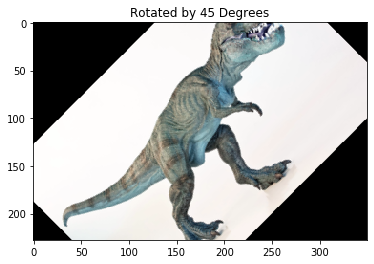

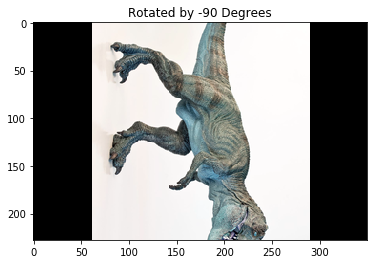

In [11]:
# Grab the dimensions of the image and calculate the center
# of the image
(h, w) = image.shape[:2]
center = (w // 2, h // 2)

# Rotate our image by 45 degrees
M = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
plt.imshow(rotated)
plt.title('Rotated by 45 Degrees')
plt.show()


# Rotate our image by -90 degrees
M = cv2.getRotationMatrix2D(center, -90, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
plt.imshow(rotated)
plt.title('Rotated by -90 Degrees')
plt.show()



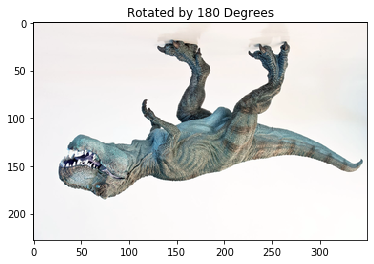

In [12]:
# Finally, let's use our helper function in imutils.py to
# rotate the image by 180 degrees (flipping it upside down)
rotated = imutils.rotate(image, 180)
plt.imshow(rotated)
plt.title('Rotated by 180 Degrees')
plt.show()

## Resize

In [11]:
# Import the necessary packages
import matplotlib.pyplot as plt
import numpy as np
import imutils
import cv2

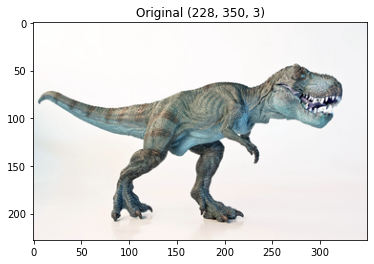

In [12]:
# Load the image and show it
img_Nm = './images/trex.png'

image = cv2.imread(img_Nm)

plt.imshow(image)
plt.title('Original '+ str(image.shape))
plt.show()

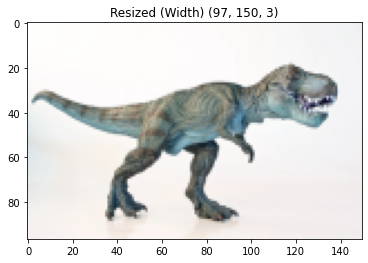

In [14]:
# We need to keep in mind aspect ratio so the image does
# not look skewed or distorted -- therefore, we calculate
# the ratio of the new image to the old image. Let's make
# our new image have a width of 150 pixels
r = 150.0 / image.shape[1]
dim = (150, int(image.shape[0] * r))

# Perform the actual resizing of the image
resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)

plt.imshow(resized)
plt.title('Resized (Width) ' + str(resized.shape))
plt.show()

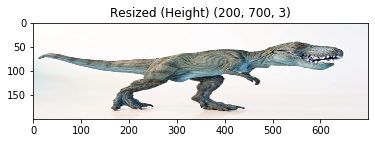

In [28]:
# What if we wanted to adjust the height of the image? We
# apply the same concept, again keeping in mind the aspect
# ratio, but instead calculating the ratio based on height.
# Let's make the height of the resized image 50 pixels
res = 1080
r = res / image.shape[0]
#dim = (int(image.shape[1] * r), res)
dim = (700, 200)
#dim = (100, 300)
#dim = (300, 300)

# Perform the resizing
resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)

plt.imshow(resized)
plt.title('Resized (Height) ' + str(resized.shape))
plt.show()

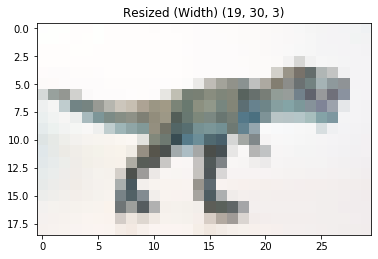

In [21]:
# Of course, calculating the ratio each and every time we
# want to resize an image is a real pain. Let's create a
# function where we can specify our target width or height,
# and have it take care of the rest for us.
resized = imutils.resize(image, width = 30)

plt.imshow(resized)
plt.title('Resized (Width) ' + str(resized.shape))
plt.show()

## Flipping

In [30]:
# Import the necessary packages
import matplotlib.pyplot as plt
import numpy as np
import imutils
import cv2

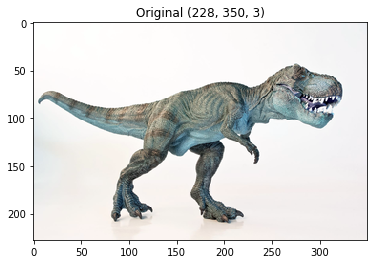

In [31]:
# Load the image and show it
img_Nm = './images/trex.png'

image = cv2.imread(img_Nm)

plt.imshow(image)
plt.title('Original '+ str(image.shape))
plt.show()

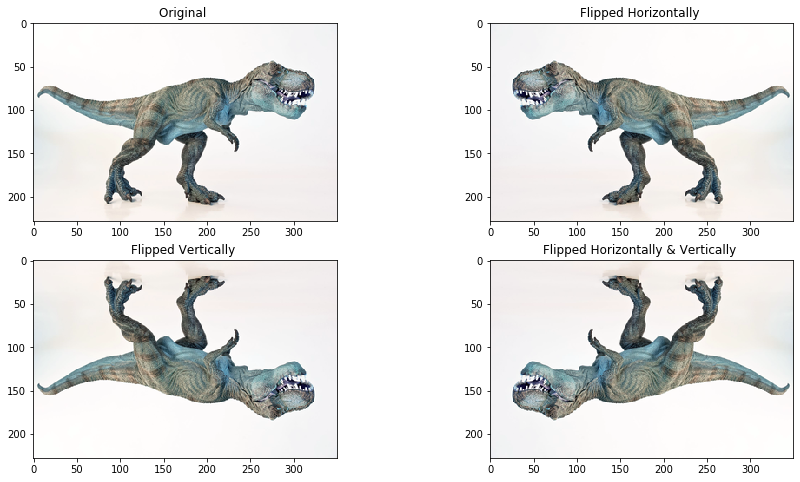

In [37]:

plt.figure(figsize=(15, 8))
plt.subplot(221)
plt.imshow(image)
plt.title('Original ')


# Flip the image horizontally
flipped = cv2.flip(image, 1)

plt.subplot(222)
plt.imshow(flipped)
plt.title('Flipped Horizontally ')



# Flip the image vertically
flipped = cv2.flip(image, 0)

plt.subplot(223)
plt.imshow(flipped)
plt.title('Flipped Vertically ')


# Flip the image along both axes
flipped = cv2.flip(image, -1)

plt.subplot(224)
plt.imshow(flipped)
plt.title('Flipped Horizontally & Vertically ')
plt.show()


## Cropping

In [38]:
# Import the necessary packages
import matplotlib.pyplot as plt
import numpy as np
import imutils
import cv2

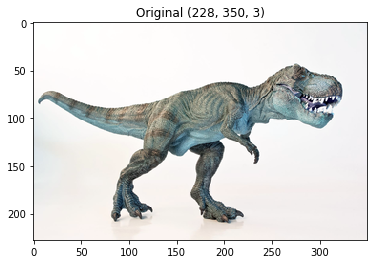

In [39]:
# Load the image and show it
img_Nm = './images/trex.png'

image = cv2.imread(img_Nm)

plt.imshow(image)
plt.title('Original '+ str(image.shape))
plt.show()

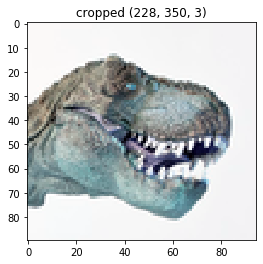

In [40]:
# Cropping an image is as simple as using array slices
# in NumPy! Let's crop out the face of the T-Rex. The
# order in which we specify the coordinates is:
#	startY:endY, startX:endX
# In this case, we are starting at Y=30 and ending at
# Y=120. Similarly, we start at X=240 and X=335.
cropped = image[30:120 , 240:335]

plt.imshow(cropped)
plt.title('cropped '+ str(image.shape))
plt.show()

## Artimetics

In [ ]:
# Import the necessary packages
import matplotlib.pyplot as plt
import numpy as np
import imutils
import cv2

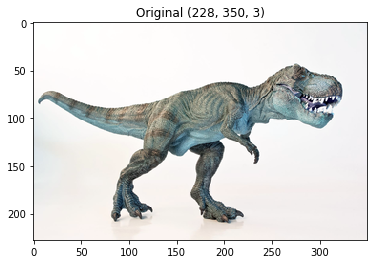

In [41]:
# Load the image and show it
img_Nm = './images/trex.png'

image = cv2.imread(img_Nm)

plt.imshow(image)
plt.title('Original '+ str(image.shape))
plt.show()

In [42]:
# Images are NumPy arrays, stored as unsigned 8 bit integers.
# What does this mean? It means that the values of our pixels
# will be in the range [0, 255]. When using functions like
# cv2.add and cv2.subtract, values will be clipped to this
# range, even if the added or subtracted values fall outside
# the range of [0, 255]. Check out an example:
print("max of 255: {}".format(cv2.add(np.uint8([200]), np.uint8([100]))))
print("min of 0: {}".format(cv2.subtract(np.uint8([50]), np.uint8([100]))))


max of 255: [[255]]
min of 0: [[0]]


In [43]:
# NOTE: If you use NumPy arithmetic operations on these arrays,
# the values will be modulos (wrap around) instead of being
# clipped to the [0, 255] arrange. This is important to keep
# in mind when working with images.
print("wrap around: {}".format(np.uint8([200]) + np.uint8([100])))
print("wrap around: {}".format(np.uint8([50]) - np.uint8([100])))

wrap around: [44]
wrap around: [206]


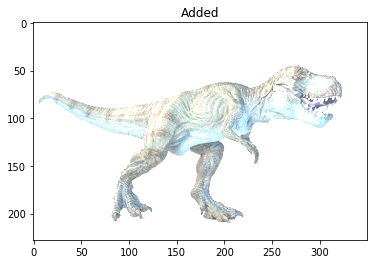

In [44]:
# Let's increase the intensity of all pixels in our image
# by 100. We accomplish this by constructing a NumPy array
# that is the same size of our matrix (filled with ones)
# and the multiplying it by 100 to create an array filled
# with 100's. Then we simply add the images together. Notice
# how the image is "brighter".
M = np.ones(image.shape, dtype = "uint8") * 100
added = cv2.add(image, M)

plt.imshow(added)
plt.title('Added')
plt.show()

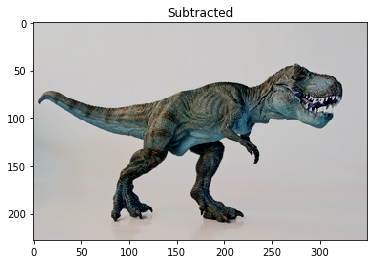

In [45]:

# Similarly, we can subtract 50 from all pixels in our
# image and make it darker:
M = np.ones(image.shape, dtype = "uint8") * 50
subtracted = cv2.subtract(image, M)

plt.imshow(subtracted)
plt.title('Subtracted')
plt.show()



## Bitwise Operations: AND, OR, XOR, NOT

In [ ]:
# Import the necessary packages
import matplotlib.pyplot as plt
import numpy as np
import imutils
import cv2

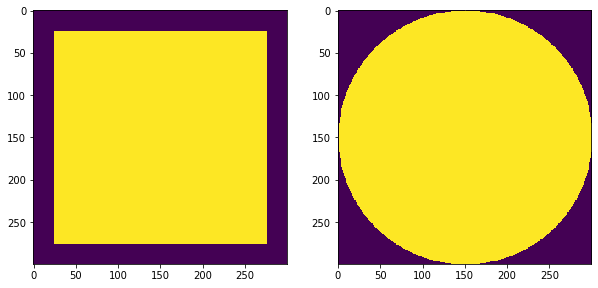

In [46]:
# First, let's draw a rectangle
rectangle = np.zeros((300, 300), dtype = "uint8")
rectangle = cv2.rectangle(rectangle, (25, 25), (275, 275), 255, -1)

# Secondly, let's draw a circle
circle = np.zeros((300, 300), dtype = "uint8")
circle = cv2.circle(circle, (150, 150), 150, 255, -1)

plt.figure(figsize=(10, 8))
plt.subplot(121)
plt.imshow(rectangle)

plt.subplot(122)
plt.imshow(circle)

plt.show()

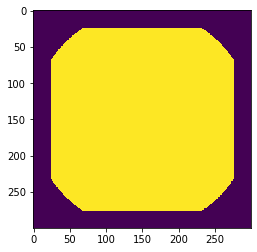

In [47]:
# A bitwise 'AND' is only True when both rectangle
# and circle have a value that is 'ON'. Simply put,
# the bitwise_and function examines every pixel in
# rectangle and circle. If both pixels have a value
# greater than zero, that pixel is turned 'ON' (i.e
# set to 255 in the output image). If both pixels
# are not greater than zero, then the output pixel
# is left 'OFF' with a value of 0.
bitwiseAnd = cv2.bitwise_and(rectangle, circle)
plt.imshow(bitwiseAnd)
plt.title('AND')
plt.show()

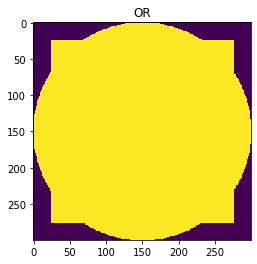

In [49]:
# A bitwise 'OR' examines every pixel in rectangle
# and circle. If EITHER pixel in rectangle or circle
# is greater than zero, then the output pixel has a
# value of 255, otherwise it is 0.
bitwiseOr = cv2.bitwise_or(rectangle, circle)
plt.imshow(bitwiseOr)
plt.title('OR')
plt.show()


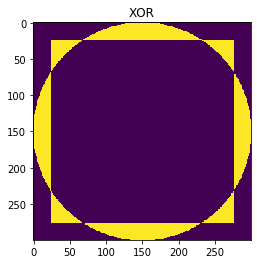

In [50]:
# The bitwise 'XOR' is identical to the 'OR' function,
# with one exception: both rectangle and circle are
# not allowed to have values greater than 0.
bitwiseXor = cv2.bitwise_xor(rectangle, circle)

plt.imshow(bitwiseXor)
plt.title('XOR')
plt.show()

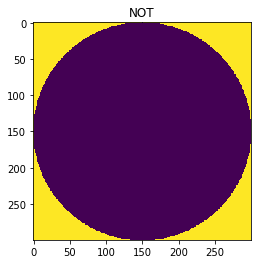

In [51]:
# Finally, the bitwise 'NOT' inverts the values of
# the pixels. Pixels with a value of 255 become 0,
# and pixels with a value of 0 become 255.
bitwiseNot = cv2.bitwise_not(circle)

plt.imshow(bitwiseNot)
plt.title('NOT')
plt.show()

In [65]:
print(image.shape[:2], bitwiseAnd.shape)

(228, 350) (300, 300)


(228, 350) (228, 350)


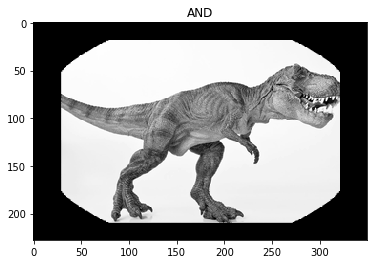

In [68]:
# Perform the resizing
dim = (image.shape[1],image.shape[0])
resized = cv2.resize(bitwiseAnd, dim, interpolation = cv2.INTER_AREA)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

print(gray.shape, resized.shape)
bitwiseAnd1 = cv2.bitwise_and(gray, resized)
plt.imshow(bitwiseAnd1,cmap='gray')
plt.title('AND')
plt.show()

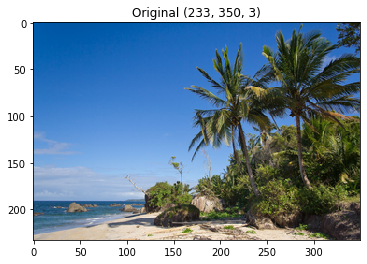

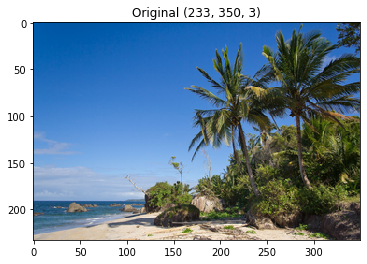

In [76]:
# Load the image and show it
img_Nm = './images/beach.png'

image = cv2.imread(img_Nm)

image1 = image.copy()
image1[:,:,0]=image[:,:,2]
image1[:,:,2]=image[:,:,0]


plt.imshow(image1)
plt.title('Original '+ str(image.shape))
plt.show()

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title('Original '+ str(image.shape))
plt.show()

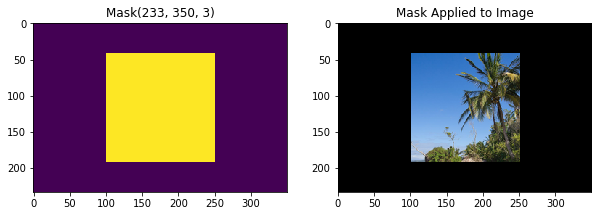

In [81]:
# Masking allows us to focus only on parts of an image that
# interest us. A mask is the same size as our image, but has
# only two pixel values, 0 and 255. Pixels with a value of 0
# are ignored in the orignal image, and mask pixels with a
# value of 255 are allowed to be kept. For example, let's
# construct a mask with a 150x150 square at the center of it
# and mask our image.
mask = np.zeros(image.shape[:2], dtype = "uint8")
(cX, cY) = (image.shape[1] // 2, image.shape[0] // 2)
mask = cv2.rectangle(mask, (cX - 75, cY - 75), (cX + 75 , cY + 75), 255, -1)

plt.figure(figsize=(10, 8))
plt.subplot(121)
plt.imshow(mask)
plt.title('Mask'+ str(image.shape))


# Apply out mask -- notice how only the center rectangular
# region of the pill is shown
masked = cv2.bitwise_and(image, image, mask = mask)
plt.subplot(122)
plt.imshow(masked)
plt.title('Mask Applied to Image')
plt.show()




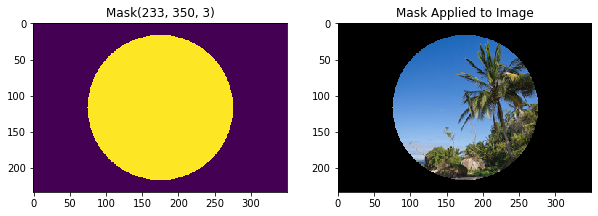

In [82]:
# Now, let's make a circular mask with a radius of 100 pixels
mask = np.zeros(image.shape[:2], dtype = "uint8")
cv2.circle(mask, (cX, cY), 100, 255, -1)
masked = cv2.bitwise_and(image, image, mask = mask)

plt.figure(figsize=(10, 8))
plt.subplot(121)
plt.imshow(mask)
plt.title('Mask'+ str(image.shape))


# Apply out mask -- notice how only the center rectangular
# region of the pill is shown
masked = cv2.bitwise_and(image, image, mask = mask)
plt.subplot(122)
plt.imshow(masked)
plt.title('Mask Applied to Image')
plt.show()


## Merge & Split

In [ ]:
# Import the necessary packages
import matplotlib.pyplot as plt
import numpy as np
import imutils
import cv2

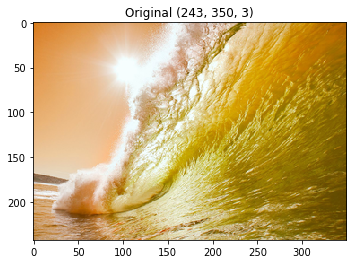

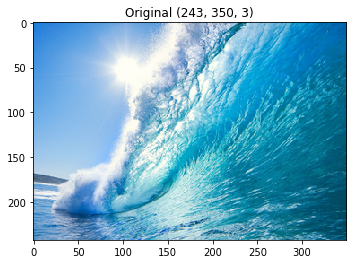

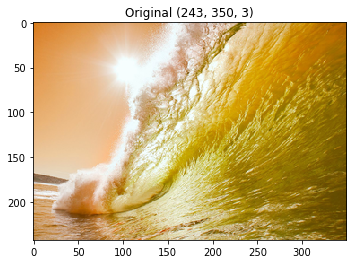

In [92]:
# Load the image and show it
img_Nm = './images/wave.png'

image = cv2.imread(img_Nm)
plt.imshow(image)
plt.title('Original '+ str(image.shape))
plt.show()

image1 = image.copy()
image1[:,:,0]=image[:,:,2]
image1[:,:,2]=image[:,:,0]


plt.imshow(image1)
plt.title('Original '+ str(image.shape))
plt.show()

#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title('Original '+ str(image.shape))
plt.show()

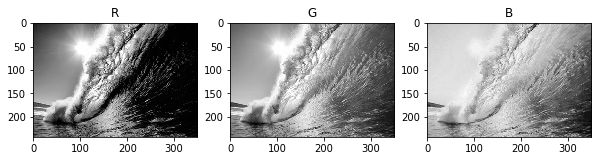

In [93]:
(B, G, R) = cv2.split(image)

# Show each channel individually

plt.figure(figsize=(10, 8))
plt.subplot(131)
plt.imshow(R, cmap= 'gray')
plt.title('R')
plt.subplot(132)
plt.imshow(G, cmap= 'gray')
plt.title('G')
plt.subplot(133)
plt.imshow(B, cmap= 'gray')
plt.title('B')
plt.show()



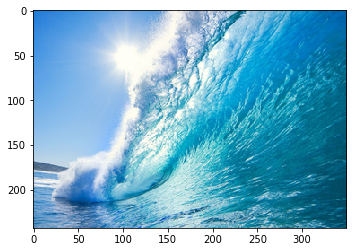

In [94]:
# Merge the image back together again
merged = cv2.merge([R, G, B])

plt.imshow(merged)
plt.show()


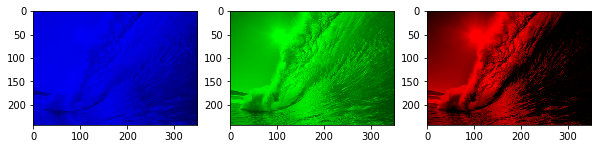

In [96]:


# Now, let's visualize each channel in color
zeros = np.zeros(image.shape[:2], dtype = "uint8")
plt.figure(figsize=(10, 8))
plt.subplot(131)
merged = cv2.merge([zeros, zeros, B])
plt.imshow(merged)

plt.subplot(132)
merged = cv2.merge([zeros, G, zeros])
plt.imshow(merged)

plt.subplot(133)
merged = cv2.merge([R, zeros, zeros])
plt.imshow(merged)

plt.show()


# Histograms 

In [ ]:
# Import the necessary packages
from matplotlib import pyplot as plt
import cv2

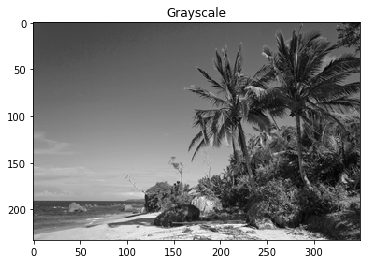

In [112]:
# Load the image and show it
img_Nm = './images/beach.png'

image = cv2.imread(img_Nm)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image, cmap = 'gray')
plt.title('Grayscale')
plt.show()

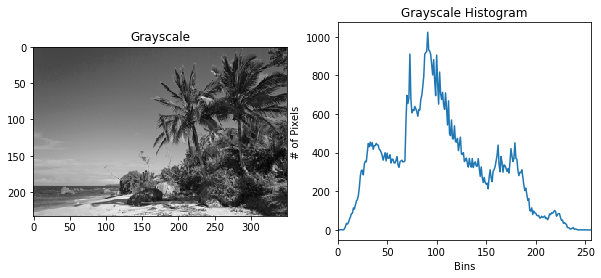

In [104]:
# Construct a grayscale histogram
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

# Plot the histogram
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.imshow(image, cmap = 'gray')
plt.title('Grayscale')
plt.subplot(122)
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()


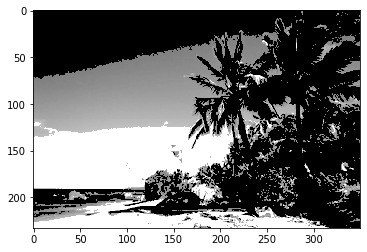

In [113]:
image[image>150]=200
image[image<100]=0
plt.imshow(image, cmap = 'gray')
plt.show()





## Color Histogram

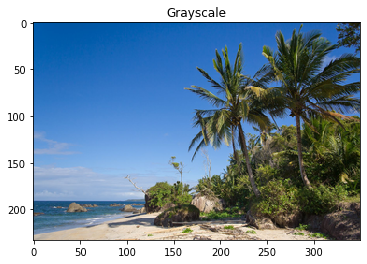

In [115]:
# Load the image and show it
img_Nm = './images/beach.png'

image = cv2.imread(img_Nm)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image, cmap = 'gray')
plt.title('Grayscale')
plt.show()

2D histogram shape: (32, 32), with 1024 values
3D histogram shape: (8, 8, 8), with 512 values


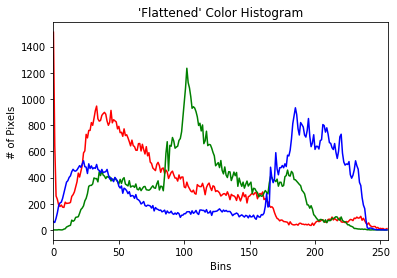

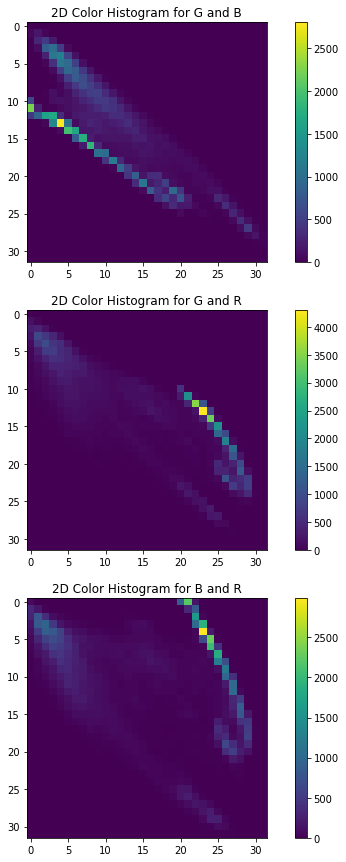

In [119]:
# Grab the image channels, initialize the tuple of colors
# and the figure
chans = cv2.split(image)
colors = ("r", "g", "b")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

# Loop over the image channels
for (chan, color) in zip(chans, colors):
    # Create a histogram for the current channel and plot it
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    plt.plot(hist, color = color)
    plt.xlim([0, 256])

# Let's move on to 2D histograms -- I am reducing the
# number of bins in the histogram from 256 to 32 so we
# can better visualize the results
fig = plt.figure(figsize=(10,15))

# Plot a 2D color histogram for green and blue
ax = fig.add_subplot(311)
hist = cv2.calcHist([chans[1], chans[0]], [0, 1], None,
                    [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for G and B")
plt.colorbar(p)

# Plot a 2D color histogram for green and red
ax = fig.add_subplot(312)
hist = cv2.calcHist([chans[1], chans[2]], [0, 1], None,
                    [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for G and R")
plt.colorbar(p)

# Plot a 2D color histogram for blue and red
ax = fig.add_subplot(313)
hist = cv2.calcHist([chans[0], chans[2]], [0, 1], None,
                    [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for B and R")
plt.colorbar(p)

# Finally, let's examine the dimensionality of one of
# the 2D histograms
print("2D histogram shape: {}, with {} values".format(
    hist.shape, hist.flatten().shape[0]))

# Our 2D histogram could only take into account 2 out
# of the 3 channels in the image so now let's build a
# 3D color histogram (utilizing all channels) with 8 bins
# in each direction -- we can't plot the 3D histogram, but
# the theory is exactly like that of a 2D histogram, so
# we'll just show the shape of the histogram
hist = cv2.calcHist([image], [0, 1, 2],
                    None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
print("3D histogram shape: {}, with {} values".format(
    hist.shape, hist.flatten().shape[0]))

# Show our plots
plt.show()

## Equalization:
Histogram equalization improves the contrast of an image
by “stretching” the distribution of pixels.

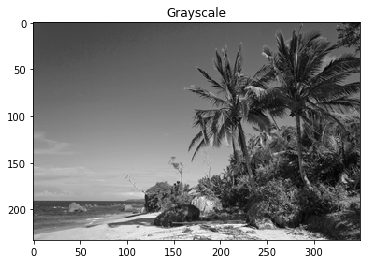

In [121]:
# Load the image and show it
img_Nm = './images/beach.png'

image = cv2.imread(img_Nm)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image, cmap = 'gray')
plt.title('Grayscale')
plt.show()

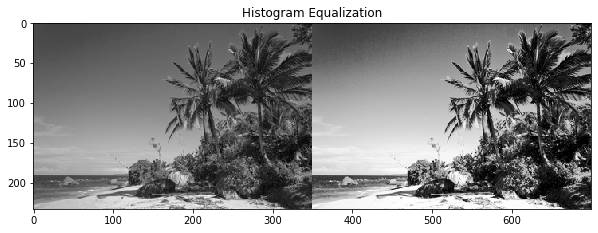

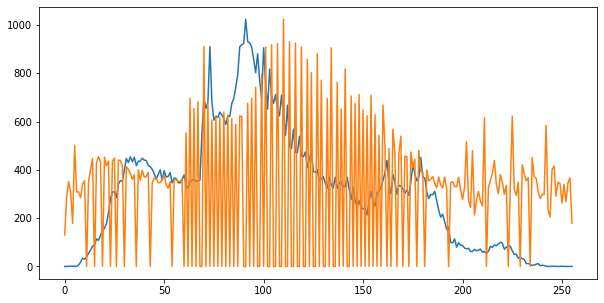

In [126]:
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

# Apply histogram equalization to stretch the constrast
# of our image
eq = cv2.equalizeHist(image)

hist1 = cv2.calcHist([eq], [0], None, [256], [0, 256])

# Show our images -- notice how the constrast of the second
# image has been stretched
plt.figure(figsize=(10,5))
plt.imshow(np.hstack([image, eq]), cmap = 'gray')
plt.title('Histogram Equalization')
plt.show()


plt.figure(figsize=(10,5))
plt.plot(hist)
plt.plot(hist1)

plt.show()

# Smoothing & Blurring

Many image processing and computer vision functions,
such as thresholding and edge detection, perform better
if the image is first smoothed or blurred.

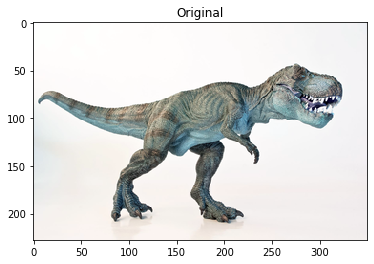

In [158]:
# Load the image and show it
img_Nm = './images/trex.png'

image = cv2.imread(img_Nm)
if False:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    noise = 50*np.random.rand(image.shape[0],image.shape[1])
    image = image + noise
plt.imshow(image, cmap = 'gray')
plt.title('Original')
plt.show()

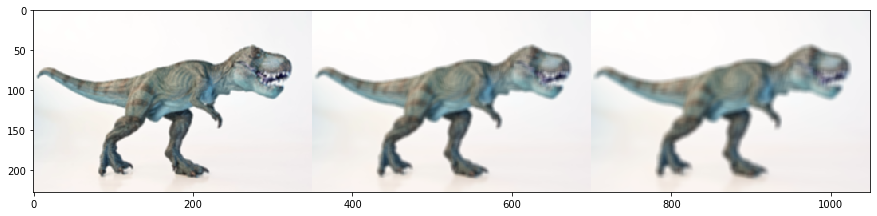

In [159]:
# Let's apply standard "averaging" blurring first. Average
# blurring (as the name suggests), takes the average of all
# pixels in the surrounding area and replaces the centeral
# element of the output image with the average. Thus, in
# order to have a central element, the area surrounding the
# central must be odd. Here are a few examples with varying
# kernel sizes. Notice how the larger the kernel gets, the
# more blurred the image becomes
blurred = np.hstack([
    cv2.blur(image, (3, 3)),
    cv2.blur(image, (5, 5)),
    cv2.blur(image, (7, 7))])

plt.figure(figsize=(15,5))
plt.imshow(blurred)
plt.show()

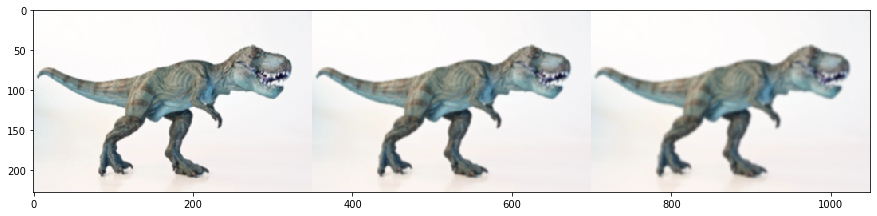

In [160]:
# We can also apply Gaussian blurring, where the relevant
# parameters are the image we want to blur and the standard
# deviation in the X and Y direction. Again, as the standard
# deviation size increases, the image becomes progressively
# more blurred
blurred = np.hstack([
    cv2.GaussianBlur(image, (3, 3), 0),
    cv2.GaussianBlur(image, (5, 5), 0),
    cv2.GaussianBlur(image, (7, 7), 0)])

plt.figure(figsize=(15,5))
plt.imshow(blurred)
plt.show()

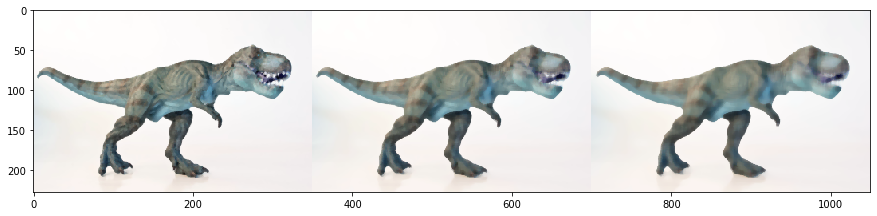

In [161]:
# The cv2.medianBlur function is mainly used for removing
# what is called "salt-and-pepper" noise. Unlike the Average
# method mentioned above, the median method (as the name
# suggests), calculates the median pixel value amongst the
# surrounding area.
blurred = np.hstack([
    cv2.medianBlur(image, 3),
    cv2.medianBlur(image, 5),
    cv2.medianBlur(image, 7)])

plt.figure(figsize=(15,5))
plt.imshow(blurred)
plt.show()

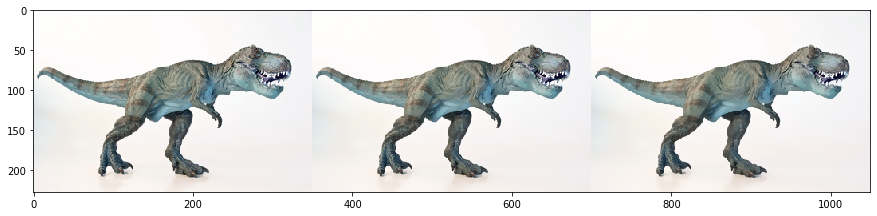

In [162]:
# You may have noticed that blurring can help remove noise,
# but also makes edge less sharp. In order to keep edges
# sharp, we can use bilateral filtering. We need to specify
# the diameter of the neighborhood (as in examples above),
# along with sigma values for color and coordinate space.
# The larger these sigma values, the more pixels will be
# considered within the neighborhood.
blurred = np.hstack([
    cv2.bilateralFilter(image, 5, 21, 21),
    cv2.bilateralFilter(image, 7, 31, 31),
    cv2.bilateralFilter(image, 9, 41, 41)])

plt.figure(figsize=(15,5))
plt.imshow(blurred)
plt.show()

## Thresholding

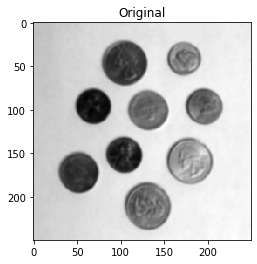

In [167]:
# Load the image and show it
img_Nm = './images/coins.png'

image = cv2.imread(img_Nm)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(image, (5, 5), 0)
plt.imshow(blurred, cmap = 'gray')
plt.title('Original')
plt.show()

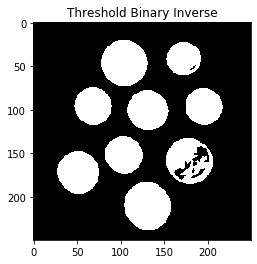

In [168]:
# Let's apply basic thresholding. The first parameter is the
# image we want to threshold, the second value is is our threshold
# cehck. If a pixel value is greater than our threshold (in this
# case, 155), we convert it to be WHITE, otherwise it is BLACK.
(T, threshInv) = cv2.threshold(blurred, 155, 255, cv2.THRESH_BINARY_INV)
plt.imshow(threshInv, cmap = 'gray')
plt.title('Threshold Binary Inverse')
plt.show()


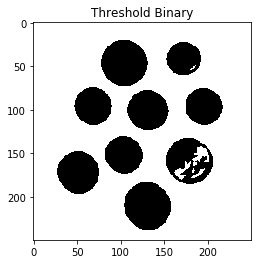

In [170]:
# Using a normal we can change the last argument in the function
# to make the coins black rather than white.
(T, thresh) = cv2.threshold(blurred, 155, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap = 'gray')
plt.title('Threshold Binary')
plt.show()



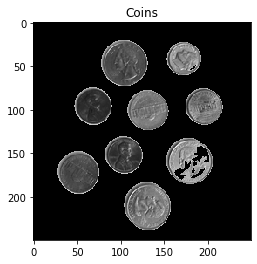

In [171]:
# Finally, let's use our threshold as a mask and visualize only
# the coins in the image

bitwiseAnd = cv2.bitwise_and(image, image, mask = threshInv)
plt.imshow(bitwiseAnd, cmap = 'gray')
plt.title('Coins')
plt.show()



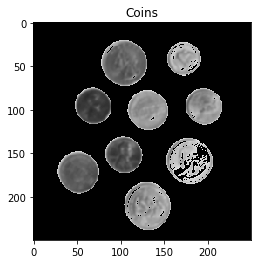

In [177]:
image1 = blurred.copy()
#image1[image>155]=255
image1[image>155]=0
plt.imshow(image1, cmap = 'gray')
plt.title('Coins')
plt.show()

## Adapting Thresholding

One of the downsides of using simple thresholding methods is that we need to manually supply our threshold value
T. Not only does finding a good value of T require a lot of manual experiments and parameter tunings, it’s not very helpful if the image exhibits a lot of range in pixel intensities.

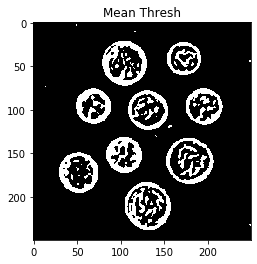

In [178]:
# In our previous example, we had to use manually specify a
# pixel value to globally threshold the image. In this example
# we are going to examine a neighborbood of pixels and adaptively
# apply thresholding to each neighborbood. In this example, we'll
# calculate the mean value of the neighborhood area of 11 pixels
# and threshold based on that value. Finally, our constant C is
# subtracted from the mean calculation (in this case 4)
thresh = cv2.adaptiveThreshold(blurred, 255,
                               cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 4)
plt.imshow(thresh, cmap = 'gray')
plt.title('Mean Thresh')
plt.show()




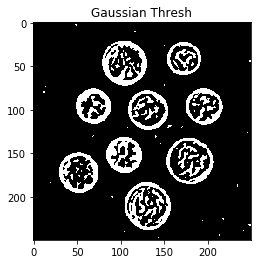

In [179]:
# We can also apply Gaussian thresholding in the same manner
thresh = cv2.adaptiveThreshold(blurred, 255,
                               cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 3)

plt.imshow(thresh, cmap = 'gray')
plt.title('Gaussian Thresh')
plt.show()



## OTSU & Riddler-Calvard

Another way we can automatically compute the threshold
value of T is to use Otsu’s method.

Otsu’s method assumes there are two peaks in the grayscale histogram of the image. It then tries to find an optimal value to separate these two peaks – thus our value of T.

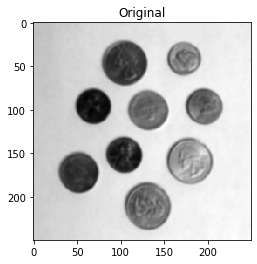

In [182]:
import mahotas
# Load the image and show it
img_Nm = './images/coins.png'

image = cv2.imread(img_Nm)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(image, (5, 5), 0)
plt.imshow(blurred, cmap = 'gray')
plt.title('Original')
plt.show()

Otsu's threshold: 137


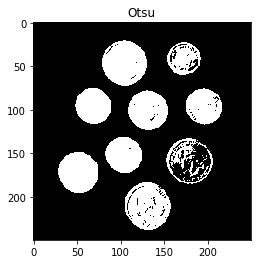

In [183]:
# OpenCV provides methods to use Otsu's thresholding, but I find
# the mahotas implementation is more 'Pythonic'. Otsu's method
# assumes that are two 'peaks' in the grayscale histogram. It finds
# these peaks, and then returns a value we should threshold on.
T = mahotas.thresholding.otsu(blurred)
print("Otsu's threshold: {}".format(T))

# Applying the threshold can be done using NumPy, where values
# smaller than the threshold are set to zero, and values above
# the threshold are set to 255 (white).
thresh = image.copy()
thresh[thresh > T] = 255
thresh[thresh < 255] = 0
thresh = cv2.bitwise_not(thresh)

plt.imshow(thresh, cmap = 'gray')
plt.title('Otsu')
plt.show()




Riddler-Calvard: 137.80118246864677


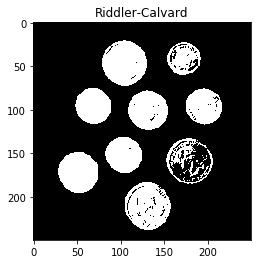

In [184]:
# An alternative is to use the Riddler-Calvard method
T = mahotas.thresholding.rc(blurred)
print("Riddler-Calvard: {}".format(T))
thresh = image.copy()
thresh[thresh > T] = 255
thresh[thresh < 255] = 0
thresh = cv2.bitwise_not(thresh)

plt.imshow(thresh, cmap = 'gray')
plt.title('Riddler-Calvard')
plt.show()


# Gradiend and Edge Detection 

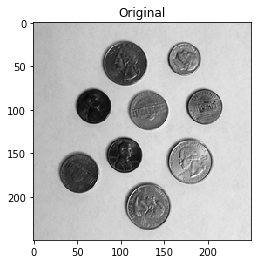

In [185]:
# Load the image and show it
img_Nm = './images/coins.png'

image = cv2.imread(img_Nm)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(image, cmap = 'gray')
plt.title('Original')
plt.show()

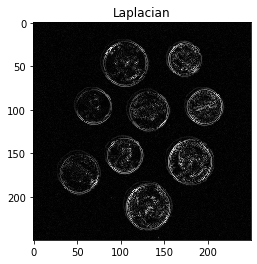

In [186]:
# Compute the Laplacian of the image
lap = cv2.Laplacian(image, cv2.CV_64F)
lap = np.uint8(np.absolute(lap))

plt.imshow(lap, cmap = 'gray')
plt.title('Laplacian')
plt.show()


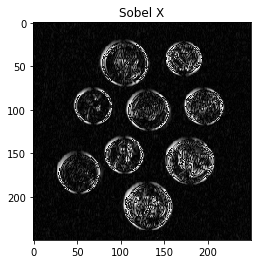

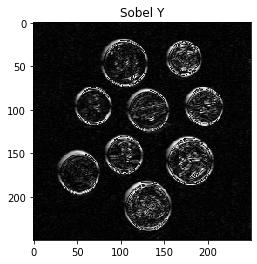

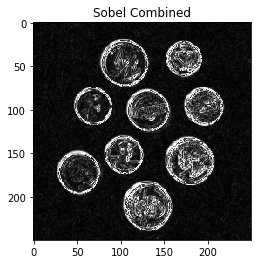

In [187]:
# Compute gradients along the X and Y axis, respectively
sobelX = cv2.Sobel(image, cv2.CV_64F, 1, 0)
sobelY = cv2.Sobel(image, cv2.CV_64F, 0, 1)

# The sobelX and sobelY images are now of the floating
# point data type -- we need to take care when converting
# back to an 8-bit unsigned integer that we do not miss
# any images due to clipping values outside the range
# of [0, 255]. First, we take the absolute value of the
# graident magnitude images, THEN we convert them back
# to 8-bit unsigned integers
sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))

# We can combine our Sobel gradient images using our
# bitwise OR
sobelCombined = cv2.bitwise_or(sobelX, sobelY)

# Show our Sobel images
plt.imshow(sobelX, cmap = 'gray')
plt.title('Sobel X')
plt.show()

plt.imshow(sobelY, cmap = 'gray')
plt.title('Sobel Y')
plt.show()

plt.imshow(sobelCombined, cmap = 'gray')
plt.title('Sobel Combined')
plt.show()


## Canny Edge Detector

The Canny edge detector is a multi-step process. It involves blurring the image to remove noise, computing Sobel gradient images in the x and y direction, suppressing edges, and finally a hysteresis thresholding stage that determines if a pixel is “edge-like” or not.

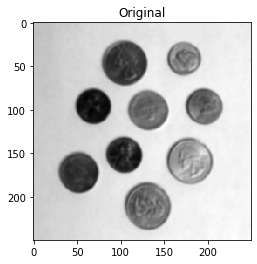

In [195]:
# Load the image, convert it to grayscale, and blur it
# slightly to remove high frequency edges that we aren't
# interested in
img_Nm = './images/coins.png'
#img_Nm = './images/trex.png'
#img_Nm = './images/beach.png'

image = cv2.imread(img_Nm)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.GaussianBlur(image, (5, 5), 0)


plt.imshow(image, cmap = 'gray')
plt.title('Original')
plt.show()


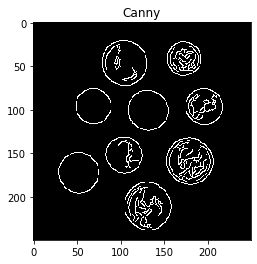

In [196]:
# When performing Canny edge detection we need two values
# for hysteresis: threshold1 and threshold2. Any gradient
# value larger than threshold2 are considered to be an
# edge. Any value below threshold1 are considered not to
# ben an edge. Values in between threshold1 and threshold2
# are either classified as edges or non-edges based on how
# the intensities are "connected". In this case, any gradient
# values below 30 are considered non-edges whereas any value
# above 150 are considered edges.
canny = cv2.Canny(image, 30, 150)
plt.imshow(canny, cmap = 'gray')
plt.title('Canny')
plt.show()


# Contours
OpenCV provides methods to find “curves” in an image,
called contours. A contour is a curve of points, with no
gaps in the curve. Contours are extremely useful for such
things as shape approximation and analysis.

In order to find contours in an image, you need to first obtain
a binarization of the image, using either edge detection
methods or thresholding. In the examples below, we’ll use
the Canny edge detector to find the outlines of the coins,
and then find the actual contours of the coins.

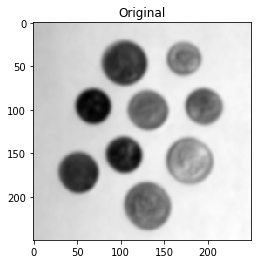

In [198]:
# Load the image, convert it to grayscale, and blur it
# slightly to remove high frequency edges that we aren't
# interested in
img_Nm = './images/coins.png'
#img_Nm = './images/trex.png'
#img_Nm = './images/beach.png'

image = cv2.imread(img_Nm)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (11, 11), 0)


plt.imshow(blurred, cmap = 'gray')
plt.title('Original')
plt.show()

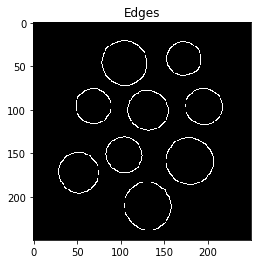

In [201]:
# The first thing we are going to do is apply edge detection to
# the image to reveal the outlines of the coins
edged = cv2.Canny(blurred, 30, 150)
plt.imshow(edged, cmap = 'gray')
plt.title('Edges')
plt.show()


I count 9 coins in this image


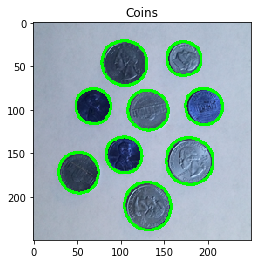

In [208]:
# Find contours in the edged image.
# NOTE: The cv2.findContours method is DESTRUCTIVE to the image
# you pass in. If you intend on reusing your edged image, be
# sure to copy it before calling cv2.findContours
(cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# How many contours did we find?
print("I count {} coins in this image".format(len(cnts)))

# Let's highlight the coins in the original image by drawing a
# green circle around them
coins = image.copy()
coins = cv2.drawContours(coins, cnts, -1, (0, 255, 0), 2)
plt.imshow(coins, cmap = 'gray')
plt.title('Coins')
plt.show()




Coin #1


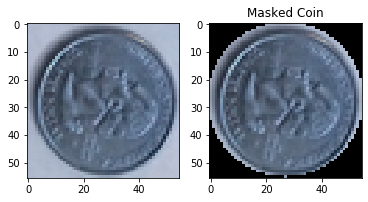

Coin #2


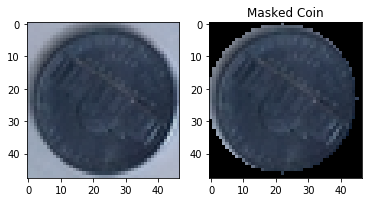

Coin #3


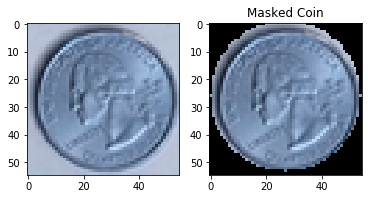

Coin #4


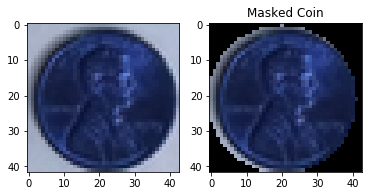

Coin #5


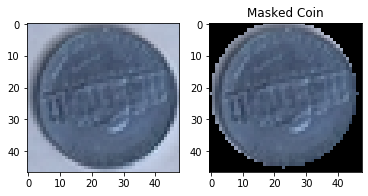

Coin #6


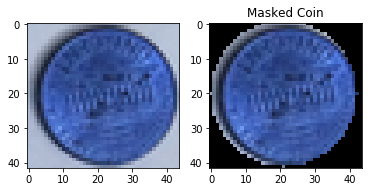

Coin #7


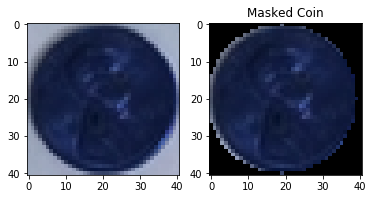

Coin #8


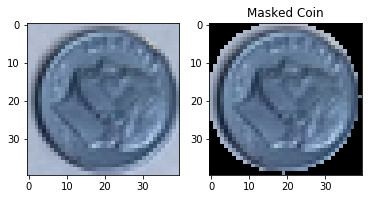

Coin #9


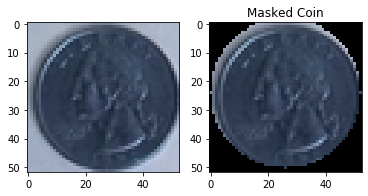

In [209]:
# Now, let's loop over each contour
for (i, c) in enumerate(cnts):
    # We can compute the 'bounding box' for each contour, which is
    # the rectangle that encloses the contour
    (x, y, w, h) = cv2.boundingRect(c)

    # Now that we have the contour, let's extract it using array
    # slices
    print("Coin #{}".format(i + 1))
    coin = image[y:y + h, x:x + w]
    plt.subplot(121)
    plt.imshow(coin)
    

    # Just for fun, let's construct a mask for the coin by finding
    # The minumum enclosing circle of the contour
    mask = np.zeros(image.shape[:2], dtype = "uint8")
    ((centerX, centerY), radius) = cv2.minEnclosingCircle(c)
    mask = cv2.circle(mask, (int(centerX), int(centerY)), int(radius), 255, -1)
    mask = mask[y:y + h, x:x + w]
    bitwiseAnd = cv2.bitwise_and(coin, coin, mask = mask)
    plt.subplot(122)
    plt.imshow(bitwiseAnd, cmap = 'gray')
    plt.title('Masked Coin')
    plt.show()
    